<a href="https://colab.research.google.com/github/jrebull/NLP/blob/main/Team18_MNA_NLP_semana_10_Actividad_10_3_modelosLLM_IA_Trabajo_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

# ✨ **Actividad en Equipos - Semana 10** ✨
## 10.3 Actividad: modelos LLM y IA en tu lugar de trabajo.
---
---

## 🗓️ **Información General**
> **Fecha de Entrega:** Miercoles, 25 de Junio de 2025
>
> **Versión del Documento:** `v1.0`

---
---

## 👥 **Autores del Proyecto**

> ### 👨‍💻 **Juan Carlos Pérez Nava**
> `A01795941`
>
> ### 👨‍💻 **Javier Augusto Rebull Saucedo**
> `A01795838`
>
> ### 👩‍💻 **Sihiní Trinidad Sánchez**
> `A00889358`
>
> ### 👩‍💻 **Iris Monserrat Urbina Casas**
> `A01795999`

---
---

## 👨‍🏫 **Supervisión Académica**
> **Profesor Tutor:**
>
> Rodolfo Miguel Gameros Leal

> **Profesor Titular:**
>
> Luis Eduardo Falcón Morales

---
---

# 🎯 Objetivos
- **3.3** Modelos Transformer y LLM.
- **3.4** Soluciones basadas en modelos Transformer y generadores de texto.
- **3.5** Seleccionar los modelos Transformer y LLM que consideres adecuados.

---

# 📝 Instrucciones y Entrega

### Instrucciones Generales
En esta última actividad, el objetivo es apoyarte en los modelos LLM como soporte para encontrar ideas de cómo implementar algún proyecto de IA en tu lugar de trabajo o en alguna temática en la que veas un área de oportunidad.

1.  **Descarga** el archivo PDF con las instrucciones de la actividad: `MNA_NLP_semana_10_Actividad_2025.pdf`.
2.  **Sigue** las indicaciones del archivo para llevar a cabo las tareas.
3.  **Sube** tu archivo final (Word, PDF o JupyterNotebook) a GitHub.
4.  **Entrega** en Canvas únicamente la liga a tu archivo en GitHub.

> Puedes consultar el documento `Archivos en GitHub` para ver las instrucciones de cómo subir y compartir tu trabajo.

### Especificaciones de Entrega
- **Modalidad:** En equipo.
- **Medio de entrega:** Subir el archivo a GitHub y pegar la liga en la tarea de Canvas.
- **Formato:** Archivo Word, PDF o Jupyter Notebook (`.ipynb`).
- **Nombre del entregable:** `EquipoXX_semana10.ipynb`

---

# 📄 Guía de la Actividad

## 💡 Fase 1: Propuesta de Proyecto por Integrante
En la actividad de esta semana **trabajarán en equipos**. El objetivo es proponer ideas de cómo aplicar la **Inteligencia Artificial** en alguna tarea de tu trabajo o área de interés, preferentemente incluyendo **procesamiento de lenguaje natural**.

Al final, cada equipo deberá contar con **al menos una idea de proyecto** bien definida.

Cada integrante deberá proponer una idea incluyendo:

- **🎯 Problemática a resolver:** La necesidad u oportunidad que se abordará.
- **📊 Datos Involucrados:** Qué tipo de datos se necesitarían y de dónde provendrían.
- **🏢 Áreas Involucradas:** Qué departamentos de la organización participarían en el proceso.
- **🤖 Modelos de IA:** Qué algoritmos o arquitecturas se podrían utilizar (ej. LLMs, clasificación, etc.).
- **🎁 Entregable y Tecnología:** Cuál sería el producto final (un dashboard, API, reporte) y qué tecnologías se usarían.
- **⏳💰 Recursos:** Una estimación aproximada de los tiempos y costos del proyecto.

---

## 🚀 Fase 2: Desarrollo de la Idea Seleccionada
De entre todas las ideas propuestas, **seleccionen una** para desarrollarla con mayor detalle entre todo el equipo. Para ello:

**a. Seleccionar un LLM** 🤖
> Indiquen el modelo y versión de su preferencia (ej. Gemini, ChatGPT, Llama, Claude, etc.).

**b. Usar Ingeniería de Instrucciones (Prompt Engineering)** 🛠️
> Apóyense en el LLM para obtener una primera guía (una propuesta de proyecto o *business case*) sobre los pasos a seguir. Hagan todas las preguntas necesarias para refinar la información. El objetivo es generar un documento base, no la implementación final.

> ---
> **✍️ Conclusiones Finales**
>
> Al terminar, incluyan sus conclusiones finales sobre la actividad.

----

# 👩‍💻 **Propuesta de: Iris Monserrat Urbina Casas**
> **ID:** `A01795999`

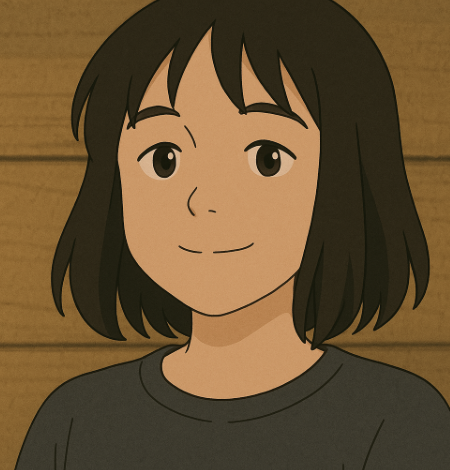

-   **🎯 Problemática a resolver:** [Describe la necesidad u oportunidad que se abordará]
-   **📊 Datos Involucrados:** [Describe el tipo de datos necesarios y su origen]
-   **🏢 Áreas Involucradas:** [Menciona los departamentos o áreas que participarían]
-   **🤖 Modelos de IA:** [Sugiere los algoritmos o arquitecturas a utilizar]
-   **🎁 Entregable y Tecnología:** [Define el producto final y las tecnologías requeridas]
-   **⏳💰 Recursos:** [Estima de forma aproximada los tiempos y costos]

---
---
---

# 👩‍💻 **Propuesta de: Sihiní Trinidad Sánchez**
> **ID:** `A00889358`

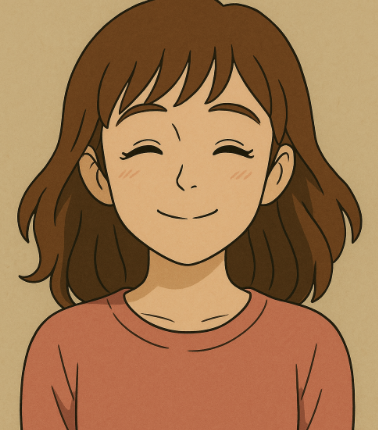

-   **🎯 Problemática a resolver:** [Describe la necesidad u oportunidad que se abordará]
-   **📊 Datos Involucrados:** [Describe el tipo de datos necesarios y su origen]
-   **🏢 Áreas Involucradas:** [Menciona los departamentos o áreas que participarían]
-   **🤖 Modelos de IA:** [Sugiere los algoritmos o arquitecturas a utilizar]
-   **🎁 Entregable y Tecnología:** [Define el producto final y las tecnologías requeridas]
-   **⏳💰 Recursos:** [Estima de forma aproximada los tiempos y costos]


---
---
---

# 👨‍💻 **Propuesta de: Juan Carlos Pérez Nava**
> **ID:** `A01795941`

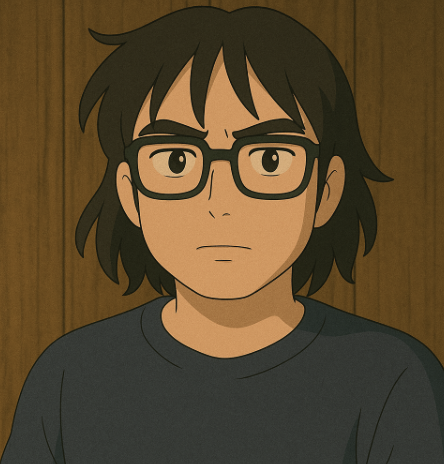

-   **🎯 Problemática a resolver:** [Describe la necesidad u oportunidad que se abordará]
-   **📊 Datos Involucrados:** [Describe el tipo de datos necesarios y su origen]
-   **🏢 Áreas Involucradas:** [Menciona los departamentos o áreas que participarían]
-   **🤖 Modelos de IA:** [Sugiere los algoritmos o arquitecturas a utilizar]
-   **🎁 Entregable y Tecnología:** [Define el producto final y las tecnologías requeridas]
-   **⏳💰 Recursos:** [Estima de forma aproximada los tiempos y costos]

---
---
---

# 👨‍💻 **Propuesta de: Javier Augusto Rebull Saucedo**
> **ID:** `A01795838`

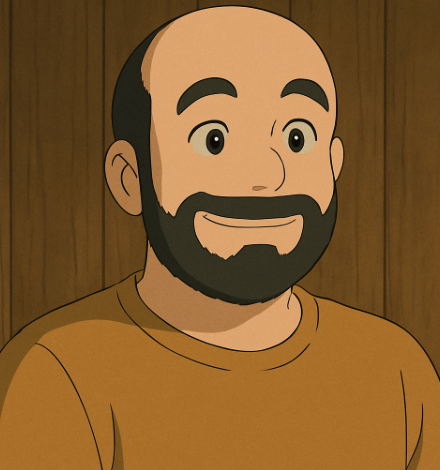

-   **🎯 Problemática a resolver:** En Santander Bank US, cada vez que se solicita una ejecución de un script SQL (Query) en los ambientes de Pre-Producción o Producción de la base de datos Oracle Exadata, es mandatorio y auditable entregar un script de _rollback_ que revierta los cambios solicitados. Este proceso es manual, propenso a errores humanos y consume tiempo valioso de los desarrolladores. La creación incorrecta de un _rollback_ puede causar graves problemas de integridad de datos si necesita ser ejecutado.

-   **📊 Datos Involucrados:**
    -   **Datos de Entrada:** Scripts de SQL escritos en el dialecto de Oracle (PL/SQL). Estos scripts contienen sentencias DML (`INSERT`, `UPDATE`, `DELETE`). Los datos provienen directamente de los desarrolladores que solicitan el cambio en la base de datos.
    -   **Datos de Salida:** Un script de SQL (PL/SQL) autogenerado que contenga la lógica de _rollback_ inversa a la del script original. El script debe estar formateado en líneas con una longitud no mayor a 70 caracteres para ser compatible con la herramienta de ejecución de JCL en Microfocus.

-   **🏢 Áreas Involucradas:**
    -   **PMO de Santander:** Gestión y supervisión del proyecto.
    -   **Change Management USA:** Aprobación y control del proceso de cambios.
    -   **IT Department:** Desarrollo, implementación y mantenimiento de la herramienta.
    -   **Centro de Control Batch (CCB) México:** Ejecución final de los scripts en los ambientes de Oracle.

-   **🤖 Modelos de IA:**
    -   Se propone utilizar un **Modelo de Lenguaje Grande (LLM)** especializado en código, como **Google-Gemini** o una versión afinada de **LLaMA (Code Llama)**.
    -   La solución se basa en **Procesamiento de Lenguaje Natural (NLP)** para analizar la sintaxis y semántica de un script de SQL, identificar las operaciones DML y generar el script inverso correspondiente.

-   **🎁 Entregable y Tecnología:**
    -   **Entregable:** Una aplicación web o una herramienta de línea de comandos donde el usuario pueda pegar su script de SQL y, con un clic, obtenga el script de _rollback_ formateado y listo para descargar.
    -   **Tecnologías Requeridas:**
        -   **Backend:** Python con un framework como Flask o FastAPI.
        -   **Frontend:** HTML, CSS, y JavaScript (posiblemente con un framework como React o Vue.js para una mejor experiencia).
        -   **IA/LLM:** API de Gemini o un modelo auto-alojado como Code Llama.
        -   **Base de Datos:** Oracle Exadata (como fuente de las queries).
        -   **Infraestructura de Ejecución:** JCL en Microfocus.

-   **⏳💰 Recursos y Tiempos y Costos Aproximados:**
    -   **Personal:**
        -   **Activos (Full-time en el proyecto):** 2 Desarrolladores.
        -   **Pasivos (Part-time / Supervisión):** 1 Project Manager (PMO), 1 Gestor de Releases (Change Management), 1 Supervisor de Oracle (IT), 1 integrante del CCB MX.
    -   **Estimación de Tiempo:** 8 semanas (aproximadamente 2 meses).
        -   **Semana 1-2:** Diseño de la solución, pruebas de concepto con el LLM, y configuración del entorno.
        -   **Semana 3-6:** Desarrollo del backend, frontend, e integración con la API del LLM.
        -   **Semana 7:** Pruebas de integración y UAT (User Acceptance Testing) con las áreas involucradas.
        -   **Semana 8:** Despliegue, documentación y capacitación.
    -   **Estimación de Costo:**
        -   **Costo de personal activo:** 2 desarrolladores * 40 horas/semana * 8 semanas * $100/hora = **$64,000 USD**.
        -   **Costo de personal pasivo (estimado 5 horas/semana):** 4 personas * 5 horas/semana * 8 semanas * $100/hora = **$16,000 USD**.
        -   **Costo total estimado del proyecto:** **$80,000 USD** (más posibles costos de API del LLM si no es un modelo auto-alojado).

---
---
---

In [3]:
# 1. INSTALAR DEPENDENCIAS (ejecutar primero en una celda separada)
!pip install chromadb sentence-transformers transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s et

In [4]:

# 2. IMPORTAR LIBRERÍAS
import torch
from transformers import AutoTokenizer, AutoModel
import chromadb
from chromadb.config import Settings
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

# 3. CARGAR BETO
modelo = "dccuchile/bert-base-spanish-wwm-uncased"
tokenizer = AutoTokenizer.from_pretrained(modelo)
model = AutoModel.from_pretrained(modelo).to("cuda" if torch.cuda.is_available() else "cpu")

# 4. TEXTOS DE SALUD MENTAL (puedes cargar tus propios)
documentos = [
    {"id": "1", "contenido": "La ansiedad puede manejarse con respiración profunda y meditación diaria."},
    {"id": "2", "contenido": "La depresión no es debilidad. Hablar con un profesional es una buena opción."},
    {"id": "3", "contenido": "El insomnio puede estar relacionado con estrés o ansiedad acumulada."},
    {"id": "4", "contenido": "la caida de pito se resuelve con hilo y aguja" },
    # Agrega más textos aquí
]

# 5. INICIALIZAR EMBEDDINGS Y ChromaDB
embedding_func = SentenceTransformerEmbeddingFunction(model_name="all-MiniLM-L6-v2")

client = chromadb.Client(Settings(anonymized_telemetry=False))
collection = client.create_collection(name="salud_mental", embedding_function=embedding_func)

for doc in documentos:
    collection.add(documents=[doc["contenido"]], metadatas=[{"tema": "salud"}], ids=[doc["id"]])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/310 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/486k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
from huggingface_hub import login


In [6]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

modelo_mistral = "mistralai/Mistral-7B-Instruct-v0.2"
tokenizer = AutoTokenizer.from_pretrained(modelo_mistral)
model = AutoModelForCausalLM.from_pretrained(modelo_mistral, torch_dtype=torch.float16, device_map="auto")

tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [7]:
# 6. CONSULTA DEL USUARIO
consulta = "¿Qué puedo hacer si sufro de ansiedad?"
resultados = collection.query(query_texts=[consulta], n_results=2)

contexto = "\n".join(resultados['documents'][0])
prompt = f"Contexto:\n{contexto}\n\nPregunta: {consulta}\nRespuesta en español:"

In [8]:
# Tokenizar el prompt antes de pasarlo al modelo
inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

# Generar la respuesta
outputs = model.generate(**inputs, max_new_tokens=200)


print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Contexto:
El insomnio puede estar relacionado con estrés o ansiedad acumulada.
La ansiedad puede manejarse con respiración profunda y meditación diaria.

Pregunta: ¿Qué puedo hacer si sufro de ansiedad?
Respuesta en español: Si estás sufriendo de ansiedad, hay algunas cosas que puedes hacer para ayudarte a sentirme mejor. Una de ellas es practicar la respiración profunda. Sientate cómodamente en una silla o en el suelo, coloca las manos en tu vientre y respira a través de tu nariz hasta que tu vientre se haga inflar. Luego, sujeta el vientre y exhala a través de la boca. Repite este proceso varias veces hasta que te sientes más tranquilo. Otra cosa que puede ayudarte es practicar la meditación diaria. Sitúate en un lugar tranquilo y silencioso, cierra los ojos y concentra tu mente en un punto fijo, como un punto en el techo o en el centro de tu frente. Intentá


In [9]:
print("Documentos recuperados:")
for doc in resultados['documents'][0]:
    print(doc)


Documentos recuperados:
El insomnio puede estar relacionado con estrés o ansiedad acumulada.
La ansiedad puede manejarse con respiración profunda y meditación diaria.


In [10]:
consulta = "se me cae el pito!!!"
resultados = collection.query(query_texts=[consulta], n_results=2)

contexto = "\n".join(resultados['documents'][0])
prompt = f"Contexto:\n{contexto}\n\nPregunta: {consulta}\nRespuesta en español:"

In [11]:
# Tokenizar el prompt antes de pasarlo al modelo
inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

# Generar la respuesta
outputs = model.generate(**inputs, max_new_tokens=500, do_sample=True, temperature=0.2)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Contexto:
la caida de pito se resuelve con hilo y aguja
El insomnio puede estar relacionado con estrés o ansiedad acumulada.

Pregunta: se me cae el pito!!!
Respuesta en español: Lo siento, pero primero debes tratar de calmar tu mente. El insomnio puede ser causado por estrés o ansiedad acumulada. Intentá relajarte antes de dormir, evitando las pantallas luminosas y manteniendo una rutina de sueño regular. Si el problema persiste, puedes considerar hablar con un profesional de la salud mental. Una vez que has logrado calmar tu mente, puedes intentar reparar el pito con un hilo y una aguja.

Translation: I'm sorry, but first you need to try to calm your mind. Insomnia can be caused by stress or accumulated anxiety. Try to relax before sleeping, avoiding bright screens and maintaining a regular sleep routine. If the problem persists, you can consider talking to a mental health professional. Once you have managed to calm your mind, you can try to repair the pitcher with a thread and a nee

# **Conclusiones:**





None

# **Fin de la actividad 10.3 Actividad: modelos LLM y IA en tu lugar de trabajo**

https://huggingface.co/google-bert/bert-base-uncased

https://huggingface.co/dccuchile/bert-base-spanish-wwm-uncased

https://huggingface.co/ITESM/sentece-embeddings-BETO